<a href="https://colab.research.google.com/github/francomanca93/fundamentos-NLP-con-python-y-NLTK/blob/main/3_aplicaciones_estadisticas_del_lenguaje_nGramas_colocaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk 
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px # nos permite hacer gráficos interactivos.

## Bigramas

Parejas de palabras que ocurren consecutivamente.

In [2]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

Los bigramas pueden aparecer mas de una vez, sabiendo esto podemos hacer estudio de esto usando frecuencias de aparición de este tipo de estructura en un determinado texto




In [3]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

Podemos ver que que las estructuras mas comunes son stopwords y caracteres que no son de nuestro interes

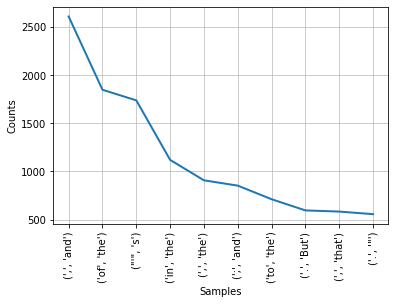

In [4]:
fdist.plot(10)

### Filtrado de bi-gramas

Como dijimos los bigramas mas comunes no representan realmente frases o estructuras lexicas de interes. Sabiendo esto aplicaremos filtros que nos permitan ver estructuras mas relevantes.

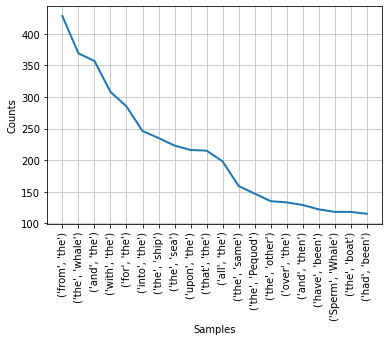

In [5]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Trigramas

md_trigrams = objeto que va a guardar una lista, el segundo argumento es la cantidad de palabras que quiero extraer

In [6]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))

# trigramas filtrados
filtered_trigrams = [trigram for trigram in md_trigrams if len(trigram[0]) > threshold and len(trigram[1]) > threshold and len(trigram[2]) > threshold]

fdist = FreqDist(filtered_trigrams)
fdist.most_common(10) 

[(('the', 'Sperm', 'Whale'), 77),
 (('the', 'White', 'Whale'), 63),
 (('the', 'old', 'man'), 32),
 (('the', 'sperm', 'whale'), 30),
 (('the', 'Right', 'Whale'), 25),
 (('the', 'same', 'time'), 24),
 (('for', 'the', 'time'), 24),
 (('must', 'have', 'been'), 23),
 (('into', 'the', 'sea'), 21),
 (('now', 'and', 'then'), 20)]

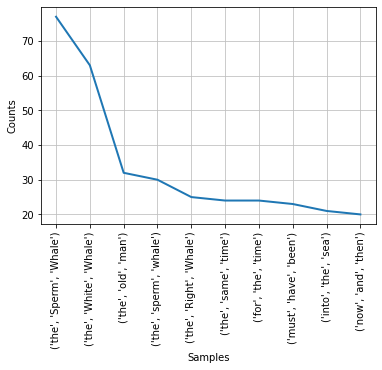

In [7]:
fdist.plot(10)


Los N-gramas en general son la base de de muchos algoritmos de NLP que tienen aplicaciones diversas en la industria: 
- Clasificacion de texto
- Identificacion del habla
- Traducción
- Algoritmos de aprendizaje de enbebimiento para los vectores de palabras o vectores de frases.

Si queremos hacer nubes de palabras, los N-gramas son las implementaciones mas simples para hacer esto.

## Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html). Existen evidencias estadisticas de que estas palabras ocurren con estas frecuecnias inusualmente alta. Sabiendo esto podemos construir frecuencias estadisticas. 

* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

**Pointwise Mutual Information (PMI)** es la métrica que utilizaremos para identificar colocaciones. Significa Información mutua punto a punto.

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

----------

$${P(w_1, w_2)}$$

Probabilidad de que un bigrama con palabras w1 y w2 aparezca. Esto es proporcional a la frecuencia de aparición de ese bigrama. 

----------

$${P(w_1)P(w_2)}$$

Probabilidad de que las palabras w1 y w2 aparezcan individualmente. Esto es proporcional a la frecuencia de aparición de cada palabra y el producto de estas.

----------




In [8]:
mb_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word)>threshold]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigrams_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_words_dist[x])

In [9]:
df

bi_grams  word_0  ... word_0_freq  word_1_freq
0             (gash, thus)    gash  ...           3          107
1      (last, disappeared)    last  ...         277           15
2         (the, fastening)     the  ...       13721            4
3           (line, beyond)    line  ...         141           23
4            (its, vapour)     its  ...         372           15
...                    ...     ...  ...         ...          ...
67937       (the, mention)     the  ...       13721           15
67938        (myself, all)  myself  ...          68         1462
67939        (tail, among)    tail  ...          78          158
67940       (glass, under)   glass  ...          19          117
67941        (the, things)     the  ...       13721          132

[67942 rows x 6 columns]

In [10]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: 
                                                                     np.log2(x.values[0]/(x.values[1]*x.values[2])),
                                                                     axis=1)

In [11]:
df

bi_grams  word_0  ... word_1_freq        PMI
0             (gash, thus)    gash  ...         107  -8.326429
1      (last, disappeared)    last  ...          15 -12.020633
2         (the, fastening)     the  ...           4 -15.744098
3           (line, beyond)    line  ...          23 -11.663113
4            (its, vapour)     its  ...          15 -12.446049
...                    ...     ...  ...         ...        ...
67937       (the, mention)     the  ...          15 -17.650989
67938        (myself, all)  myself  ...        1462 -16.601190
67939        (tail, among)    tail  ...         158 -13.589183
67940       (glass, under)   glass  ...         117 -11.118292
67941        (the, things)     the  ...         132 -18.203530

[67942 rows x 7 columns]

In [12]:
df.sort_values(by='PMI', ascending=False)

bi_grams      word_0  ... word_1_freq        PMI
11419      (Coenties, Slip)    Coenties  ...           1   0.000000
45859      (whooping, imps)    whooping  ...           1   0.000000
41217       (IMPOSING, WAY)    IMPOSING  ...           1   0.000000
57236   (knotty, Aroostook)      knotty  ...           1   0.000000
45614  (heedlessly, gambol)  heedlessly  ...           1   0.000000
...                     ...         ...  ...         ...        ...
46274            (man, the)         man  ...       13721 -22.732783
31332           (some, the)        some  ...       13721 -22.919024
35333            (one, the)         one  ...       13721 -23.540138
46700            (the, not)         the  ...        1103 -23.851315
9072             (the, but)         the  ...        1113 -23.864336

[67942 rows x 7 columns]

## Colocaciones en gráficos de dispersión

Para considerar las Colocaciones debemos tener en cuenta la frecuencia de aparicion de los bigramas y sus respectivas palabras que lo componen, asi como tambien la metrica PMI. Sabiendo esto haremos un gráfico que represente esto. 

Se agregará una nueva columna que nos ayudara a visualizar los datos, ya que PMI se encuentra en una escala logaritmica. Se aplicará log a la columna `bi_gram_freq` que es con la que se comparará.



In [13]:
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_grams  word_0  ...        PMI  log(bi_gram_freq)
0             (gash, thus)    gash  ...  -8.326429           0.000000
1      (last, disappeared)    last  ... -12.020633           0.000000
2         (the, fastening)     the  ... -15.744098           0.000000
3           (line, beyond)    line  ... -11.663113           0.000000
4            (its, vapour)     its  ... -12.446049           0.000000
...                    ...     ...  ...        ...                ...
67937       (the, mention)     the  ... -17.650989           0.000000
67938        (myself, all)  myself  ... -16.601190           0.000000
67939        (tail, among)    tail  ... -13.589183           0.000000
67940       (glass, under)   glass  ... -11.118292           0.000000
67941        (the, things)     the  ... -18.203530           2.584963

[67942 rows x 8 columns]

In [14]:
fig = px.scatter(x=df['PMI'].values , y=df['log(bi_gram_freq)'], 
                 color=df['PMI']+df['log(bi_gram_freq)'], # color que sea la suma de los valores de las columnas
                 hover_name=df['bi_grams'].values, 
                 width=600,
                 height=600,
                 labels={'x': 'PMI', 'y': 'Log(Bigram Freq)'})
fig.show()

Vemos en el eje x al PMI y en el eje y al Logaritmo de la frecuencia de los Bigramas. 

Podemos considerar a las colocaciones como los puntos que se encuentran con alta frecuencia y alto PMI (relativamante).

- Ejemplo, los puntos que se encuentran en el cuadrante PMI=(-10:-5) y Log(Bi Freq)=(6:7).En el ese cuadrante tenemos serie de palabras que tienen una aparicion  inusualmente usual en el texto del libro, y en ese sentido lo llamamos una **colocacion del Texto**. 

Despues tenemos los casos contrarios:
- Bajo frecuencia de aparicion y alto PMI: No tienen un aporte estadistico al analisis.
- Alta frecuencia de aparicion y bajo PMI: No tienen un aporte de significado o nuevo entendimiento al analisis.


Las colocaciones sirven entonces para identificar lugares importantes, personas importantes en un documento, identificar nombres propios, objetos, etc y poder empezar a asignar ciertas etiquetas a palabras o expresiones que nos puedan dar informacion de elementos cruciales en el entendimiento del texto en si mismo.

## Filtros y colocaciones en NLTK

Trabajamos en una visualizacion interactiva para identificar bigramas que tenian probabilidad altas de ser colocaciones.

Ahora realizaremos lo mismo que antes con la libreria de NLTK sin el uso de visualizaciones y de una forma mas rápida. 


In [15]:
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()  # La metrica PMI se encuentra implementada en la siguiente clase
finder = BigramCollocationFinder.from_words(text1) # a partir de las palabras de text1 implementar una clase que ayudara a encontrar las colocaicones


Apliquemos filtros de frecuencia y medidas PMI

In [16]:
finder.apply_freq_filter(20) # todo lo que tenga una frecuencia menor a 20 no lo agregue
finder.nbest(bigram_measure.pmi, 10) # Uso PMI y la cantidad de colocaciones que quiero ver.

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

Con las lineas anterior nos evitamos realizar el gráfico y encontramos los mismos resultado. La ventaja del gráfico es entender como es el proceso de encontrar las colocaciones.

## Colocaciones en textos en Español

Haremos lo mismo que antes pero con un texto en Español, un texto que incluye titulares de noticias. 

In [17]:
nltk.download('cess_esp') #descargamos un corpus en español
corpus = nltk.corpus.cess_esp.sents() # lo guardamos en una variable
flatten_corpus = [w for l in corpus for w in l] # para que nos quede una lista plana

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [18]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


Calculamos las colocaciones del corpus anterior

In [19]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10) # aplicamos el filtro de frecuencia primero
finder.nbest(bigram_measure.pmi, 10) # calculamos las colocaciones

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]